In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
inflation = pd.read_csv('Price_index.csv',index_col = 0)

inflation.astype(dtype = 'float')    ## Je m'assure du type de données ##

inflation.columns = ['price']
inflation['delta'] = ((inflation['price'] - inflation['price'].shift(12))/inflation['price']) * 100
inflation = inflation.loc['1976-01-01':'2017-03-01']
#print(inflation['delta'])

#plt.figure(1)
#inflation['delta'].plot()
#plt.show()

m2 = pd.read_csv('M2_USA.csv', index_col = 0)

m2.astype(dtype = 'float')  ## Je m'assure du type de données ##

m2.columns = ['M2']
M2 = m2['M2'] / 1000000000

delta_difference = ((M2 - M2.shift(12))/M2) * 100

delta_difference = pd.DataFrame(delta_difference)
delta_difference = delta_difference.loc['1976-01-01':'2017-03-01']

delta_difference.astype(dtype = 'float')  ## Je m'assure du type de données ##

delta_difference.columns=['M2']

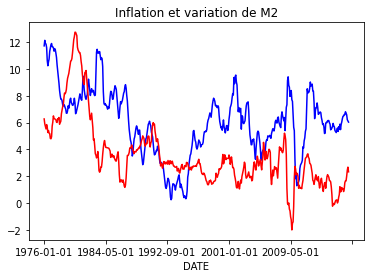

In [3]:
plt.figure()
delta_difference['M2'].plot(label='M2',color='b')
inflation['delta'].plot(label='inlfation',color='r')
plt.title('Inflation et variation de M2')
plt.show()

In [4]:
############# Analyse statistique de base #############

## inlfation et delta_difference de m1 entre 1976 et 2017 ##

x1 = inflation['delta'].values 
y1 = delta_difference['M2'].values

from scipy.stats import pearsonr
coeff_pearson = pearsonr(x1,y1)
print("coefficient de Pearson = {}".format(coeff_pearson))

coefficient de Pearson = (0.2482321926470264, 2.1848485595325583e-08)


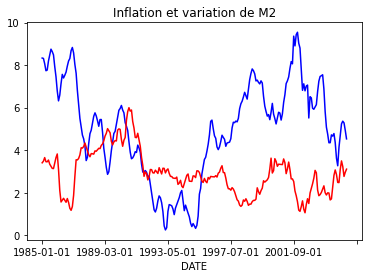

In [5]:
## inlfation et delta_difference de m1 entre 1985 et 2005 ##

delta_difference_1985 = delta_difference.loc['1985-01-01':'2005-03-01']
inflation_1985 = inflation.loc['1985-01-01':'2005-03-01']

plt.figure()
delta_difference_1985['M2'].plot(color='b')
inflation_1985['delta'].plot(color='r')
plt.title('Inflation et variation de M2')
plt.show()

In [6]:
############# Analyse statistique de base #############

delta_difference_1985 = delta_difference.loc['1985-01-01':'2005-03-01']
inflation_1985 = inflation.loc['1985-01-01':'2005-03-01']

x2 = inflation_1985['delta'].values 
y2 = delta_difference_1985['M2'].values

from scipy.stats import pearsonr
coeff_pearson = pearsonr(x2,y2)
print("coefficient de Pearson entre 1985 et 2005 = {}".format(coeff_pearson))

coefficient de Pearson entre 1985 et 2005 = (-0.2568682299031372, 5.084148150329551e-05)
